In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import validation_curve

In [2]:
x = np.arange(14)
df = pd.DataFrame({'x': x, 'p': 15-x})
df['y'] = 1e4/df['p']

In [3]:
ysc = StandardScaler()
ysc.fit(df[['y']])
df['yn'] = ysc.transform(df[['y']])

In [4]:
reg = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1e3, epsilon=1e-3))
reg.fit(df[['p']], df['yn'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1000.0, epsilon=0.001))])

In [5]:
train_scores, valid_scores = validation_curve(reg, df[['p']], df['yn'],
                                              param_name="svr__epsilon",
                                              param_range=np.logspace(-5, -2, 3, base=10), cv=5)

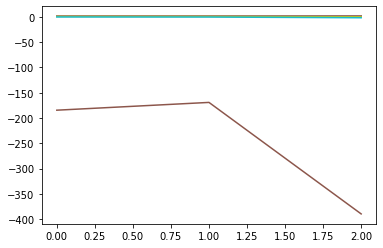

In [6]:
fig, axe = plt.subplots()
axe.plot(train_scores)
axe.plot(valid_scores)

In [7]:
reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svr', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svr__C', 'svr__cache_size', 'svr__coef0', 'svr__degree', 'svr__epsilon', 'svr__gamma', 'svr__kernel', 'svr__max_iter', 'svr__shrinking', 'svr__tol', 'svr__verbose'])

In [8]:
df['ynhat'] = reg.predict(df[['p']])
df['yhat'] = ysc.inverse_transform(df[['ynhat']])

In [9]:
df['yaerr'] = df['yhat'] - df['y']
df['yrerr'] = df['yaerr']/df['y']

In [10]:
reg.score(df[['p']], df['yn'])

0.9999646718755011

In [11]:
print(df)

     x   p            y        yn     ynhat         yhat      yaerr     yrerr
0    0  15   666.666667 -0.834823 -0.833633   668.077018   1.410352  0.002116
1    1  14   714.285714 -0.794636 -0.795247   713.562403  -0.723312 -0.001013
2    2  13   769.230769 -0.748267 -0.749627   767.619013  -1.611756 -0.002095
3    3  12   833.333333 -0.694169 -0.693498   834.128425   0.795091  0.000954
4    4  11   909.090909 -0.630235 -0.629048   910.497550   1.406641  0.001547
5    5  10  1000.000000 -0.553514 -0.555029   998.204445  -1.795555 -0.001796
6    6   9  1111.111111 -0.459744 -0.460002  1110.805275  -0.305836 -0.000275
7    7   8  1250.000000 -0.342532 -0.341099  1251.697707   1.697707  0.001358
8    8   7  1428.571429 -0.191830 -0.193295  1426.835676  -1.735753 -0.001215
9    9   6  1666.666667  0.009105  0.010458  1668.269984   1.603317  0.000962
10  10   5  2000.000000  0.290414  0.291060  2000.764717   0.764717  0.000382
11  11   4  2500.000000  0.712379  0.690511  2474.088446 -25.911

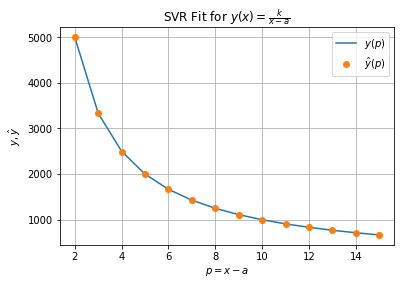

In [12]:
fig, axe = plt.subplots()
axe.plot(df['p'], df['y'], label='$y(p)$')
axe.plot(df['p'], df['yhat'], 'o', label='$\hat{y}(p)$')
axe.set_title(r"SVR Fit for $y(x) = \frac{k}{x-a}$")
axe.set_xlabel('$p = x-a$')
axe.set_ylabel('$y, \hat{y}$')
axe.legend()
axe.grid()